In [1]:
import glob
from pathlib import Path

test_path = 'D:/paddy-disease-classification/test_images'
train_path  = 'D:/paddy-disease-classification/train_images'

print('training set')
for filepath in glob.glob(train_path + '/*/'):
    files = glob.glob(filepath + '*')
    print(f"{len(files)} \t {Path(filepath).name}")

print('testing set')
for filepath in glob.glob(test_path + '/*/'):
    files = glob.glob(filepath + '*')
    print(f"{len(files)} \t {Path(filepath).name}")

training set
479 	 bacterial_leaf_blight
380 	 bacterial_leaf_streak
337 	 bacterial_panicle_blight
1738 	 blast
965 	 brown_spot
1442 	 dead_heart
620 	 downy_mildew
1594 	 hispa
1764 	 normal
1088 	 tungro
testing set


In [6]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#PreTrained Model
from tensorflow.keras.applications import *
#Image Generator DataAugmentation
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Splitting Data
# import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

In [8]:
from sklearn.model_selection import train_test_split

import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#PreTrained Model
from tensorflow.keras.applications import *
#Image Generator DataAugmentation
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Splitting Data
# import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import preprocess_input

directory = "D:/paddy-disease-classification/train_images"

# Initialize lists for file paths and labels
filepath = []
label = []

# Loop through the subdirectories in train_images
folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory, fold)

    # Ensure it is a directory (ignores other files, if any)
    if os.path.isdir(f_path):
        imgs = os.listdir(f_path)
        for img in imgs:
            img_path = os.path.join(f_path, img)
            filepath.append(img_path)
            label.append(fold)

# Create a DataFrame
file_path_series = pd.Series(filepath, name='filepath')
label_path_series = pd.Series(label, name='label')
df_train = pd.concat([file_path_series, label_path_series], axis=1)

# Display the first few rows of the DataFrame
print(df_train.head())


# Spliting in Train and Val
train_df , val_df = train_test_split(df_train ,train_size = 0.9 , shuffle = True ,random_state = 42 )# Shape
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {val_df.shape}")

                                            filepath                  label
0  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
1  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
2  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
3  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
4  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
The shape of The Train data is: (9366, 2)
The shape of The Validation data is: (1041, 2)


In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Check for available GPUs and allocate all GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Allocate all GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, False)  # Disable memory growth (allocate all memory)
    except RuntimeError as e:
        print(e)

# Dataset Path
data_dir = 'D:/paddy-disease-classification/train_images'

# Initialize lists for file paths and labels
filepath = []
label = []

# Loop through the subdirectories in train_images
folds = os.listdir(data_dir)

for fold in folds:
    f_path = os.path.join(data_dir, fold)

    # Ensure it is a directory (ignores other files, if any)
    if os.path.isdir(f_path):
        imgs = os.listdir(f_path)
        for img in imgs:
            img_path = os.path.join(f_path, img)
            filepath.append(img_path)
            label.append(fold)

# Create a DataFrame
file_path_series = pd.Series(filepath, name='filepath')
label_path_series = pd.Series(label, name='label')
df_train = pd.concat([file_path_series, label_path_series], axis=1)

# Display the first few rows of the DataFrame
print(df_train.head())

# Split data into training and validation sets
train_df, val_df = train_test_split(df_train, train_size=0.9, shuffle=True, random_state=42)

# Display dataset shapes
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {val_df.shape}")

# Initialize the ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images by 30 degrees
    width_shift_range=0.2,  # Randomly shift the image horizontally by 20%
    height_shift_range=0.2,  # Randomly shift the image vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom in or out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformation
)

# Initialize the ImageDataGenerator for validation (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the training dataset using the ImageDataGenerator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,  # No need to provide a directory as the file paths are in the dataframe
    x_col='filepath',
    y_col='label',
    target_size=(256, 256),  # Resize images to 256x256
    batch_size=32,
    class_mode='sparse'  # Sparse categorical labels for multi-class classification
)

# Create the validation dataset using the ImageDataGenerator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,  # No need to provide a directory as the file paths are in the dataframe
    x_col='filepath',
    y_col='label',
    target_size=(256, 256),  # Resize images to 256x256
    batch_size=32,
    class_mode='sparse'  # Sparse categorical labels for multi-class classification
)

# Build the model using a pre-trained model (e.g., DenseNet121)
DenseNet121_base = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')
DenseNet121_base.trainable = False  # Freeze the pre-trained layers

model = Sequential([
    DenseNet121_base,
    BatchNormalization(),
    Dropout(0.35),
    Dense(220, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Set up EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(
    patience=10,  # Wait for 10 epochs before stopping
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(val_generator)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


                                            filepath                  label
0  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
1  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
2  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
3  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
4  D:/paddy-disease-classification/train_images\b...  bacterial_leaf_blight
The shape of The Train data is: (9366, 2)
The shape of The Validation data is: (1041, 2)
Found 9366 validated image filenames belonging to 10 classes.
Found 1041 validated image filenames belonging to 10 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 220)                 │         225,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,269,310 (27.73 MB)

 Trainable params: 229,758 (897.49 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 269s 885ms/step - accuracy: 0.3916 - loss: 1.8119 - val_accuracy: 0.5831 - val_loss: 1.2433
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 260s 888ms/step - accuracy: 0.5727 - loss: 1.2217 - val_accuracy: 0.7022 - val_loss: 0.9427
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 260s 887ms/step - accuracy: 0.6325 - loss: 1.0861 - val_accuracy: 0.7281 - val_loss: 0.8352
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 274s 935ms/step - accuracy: 0.6696 - loss: 0.9661 - val_accuracy: 0.7166 - val_loss: 0.8646
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 267s 910ms/step - accuracy: 0.6982 - loss: 0.8888 - val_accuracy: 0.7253 - val_loss: 0.8136
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 276s 941ms/step - accuracy: 0.7107 - loss: 0.8785 - val_accuracy: 0.7723 - val_loss: 0.7426
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 269s 917ms/step - accuracy: 0.7313 - loss: 0.8009 - val_accuracy: 0.7224 - val_loss: 0.8451
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 266s 906ms/step - accuracy: 

Style not found, using default style.


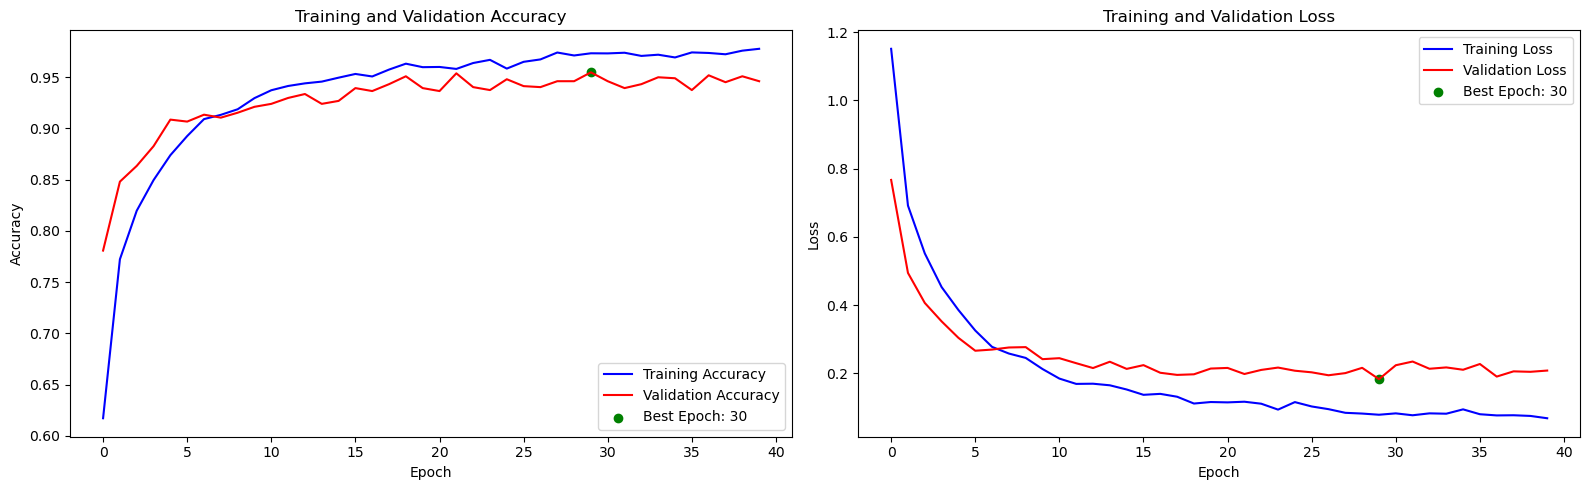

In [19]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
try:
    plt.style.use('seaborn-darkgrid')
except OSError:
    print("Style not found, using default style.")
    plt.style.use('default')  # Fallback to default Matplotlib style


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


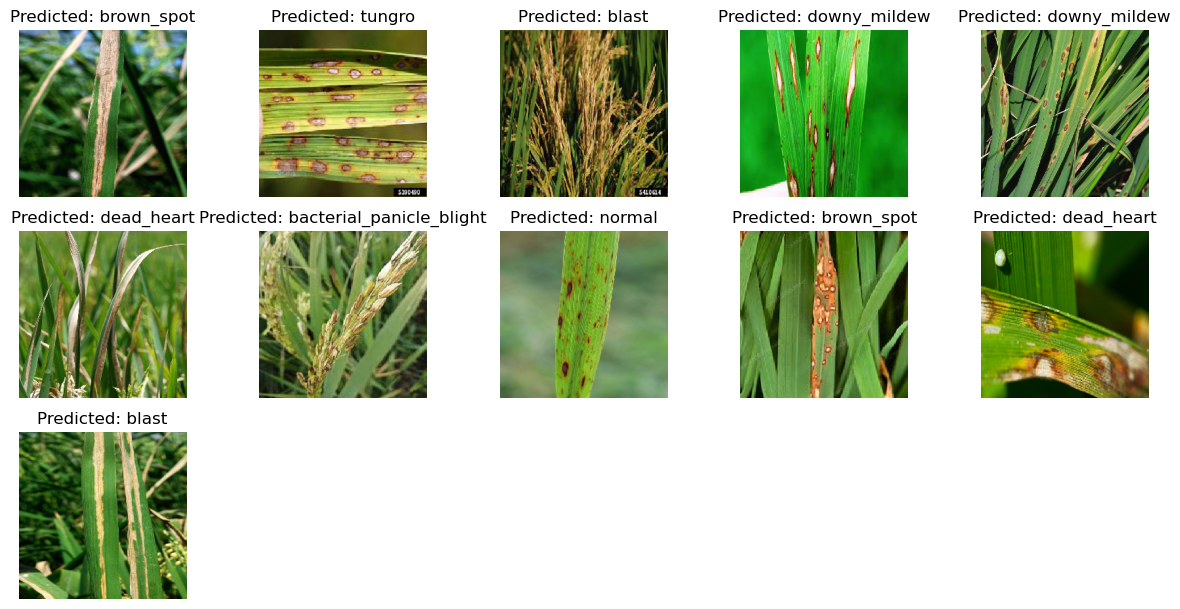

In [48]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans

# Load pre-trained DenseNet121 model
model = load_model('D:/epicccc/Model/Desnet121(rotated).keras')

# Define the directory containing images
images_dir = 'D:/epicccc/modelll'

# Define a dictionary to map predicted class indices to class names
class_names = {
    0: 'bacterial_leaf_blight',
    1: 'bacterial_leaf_streak',
    2: 'bacterial_panicle_blight',
    3: 'blast',
    4: 'brown_spot',
    5: 'dead_heart',
    6: 'downy_mildew',
    7: 'hispa',
    8: 'normal',
    9: 'tungro'
}

# Randomly select 10 image files from the directory
image_files = os.listdir(images_dir)
random_images = random.sample(image_files, 11)

# Extract features from each image
features = []
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features.append(model.predict(x).flatten())  # Flatten the output of the model

# Convert list of feature vectors to numpy array
features = np.array(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Function to display images with predicted labels
def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Predicted: {labels[i]}")
        plt.axis('off')
    plt.show()

# Predicted labels for each image
predicted_labels = []

# Print predicted labels for each image and display images
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predicted_label_index = model.predict(x)
    predicted_label = class_names[np.argmax(predicted_label_index)]  # Map predicted class index to class name
    predicted_labels.append(predicted_label)

# Display images with predicted labels
display_images_with_labels(random_images, predicted_labels)


In [46]:
try:
    model.save('D:\epicccc\Model/Desnet121(rotated).keras')
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")


Model saved successfully.


In [49]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet50 base
ResNet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')

# Freeze the base layers
ResNet50_base.trainable = False

# Build the ResNet50 model
resnet_model = Sequential()
resnet_model.add(ResNet50_base)
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.35))
resnet_model.add(Dense(220, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

# Compile the ResNet50 model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the ResNet50 model
resnet_history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=100, callbacks=[early_stopping])

# Save the ResNet50 model
resnet_model.save('D:\epicccc\Model/ResNet50.keras')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.3546 - loss: 1.9120 - val_accuracy: 0.4577 - val_loss: 1.8380
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.5288 - loss: 1.3924 - val_accuracy: 0.6240 - val_loss: 1.2478
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.6145 - loss: 1.1676 - val_accuracy: 0.6894 - val_loss: 0.9872
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.6479 - loss: 1.0570 - val_accuracy: 0.7163 - val_loss: 0.8940
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6869 - loss: 0.9544 - val_accuracy: 0.7375 - val_loss: 0.8151
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.7081 - loss: 0.8779 - val_accuracy: 0.7587 - val_loss: 0.7520
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.7358 - loss: 0.7856 - val_accuracy: 0.7692 - val_loss: 0.7440
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


C:\Users\achut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\achut\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


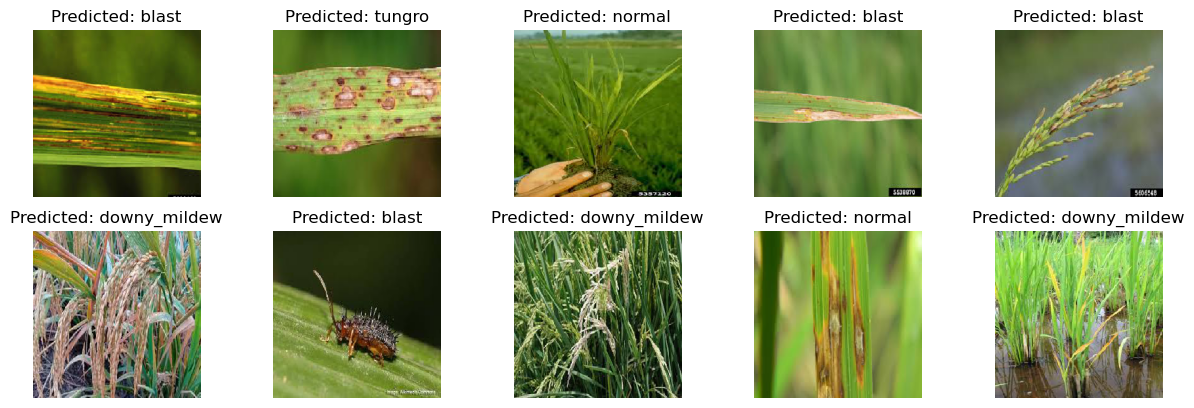

In [24]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans

# Load pre-trained DenseNet121 model
model = load_model('D:/epicccc/Model/ResNet50.keras')

# Define the directory containing images
images_dir = 'D:/epicccc/modelll'

# Define a dictionary to map predicted class indices to class names
class_names = {
    0: 'bacterial_leaf_blight',
    1: 'bacterial_leaf_streak',
    2: 'bacterial_panicle_blight',
    3: 'blast',
    4: 'brown_spot',
    5: 'dead_heart',
    6: 'downy_mildew',
    7: 'hispa',
    8: 'normal',
    9: 'tungro'
}

# Randomly select 10 image files from the directory
image_files = os.listdir(images_dir)
random_images = random.sample(image_files, 10)

# Extract features from each image
features = []
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features.append(model.predict(x).flatten())  # Flatten the output of the model

# Convert list of feature vectors to numpy array
features = np.array(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Function to display images with predicted labels
def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Predicted: {labels[i]}")
        plt.axis('off')
    plt.show()

# Predicted labels for each image
predicted_labels = []

# Print predicted labels for each image and display images
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predicted_label_index = model.predict(x)
    predicted_label = class_names[np.argmax(predicted_label_index)]  # Map predicted class index to class name
    predicted_labels.append(predicted_label)

# Display images with predicted labels
display_images_with_labels(random_images, predicted_labels)


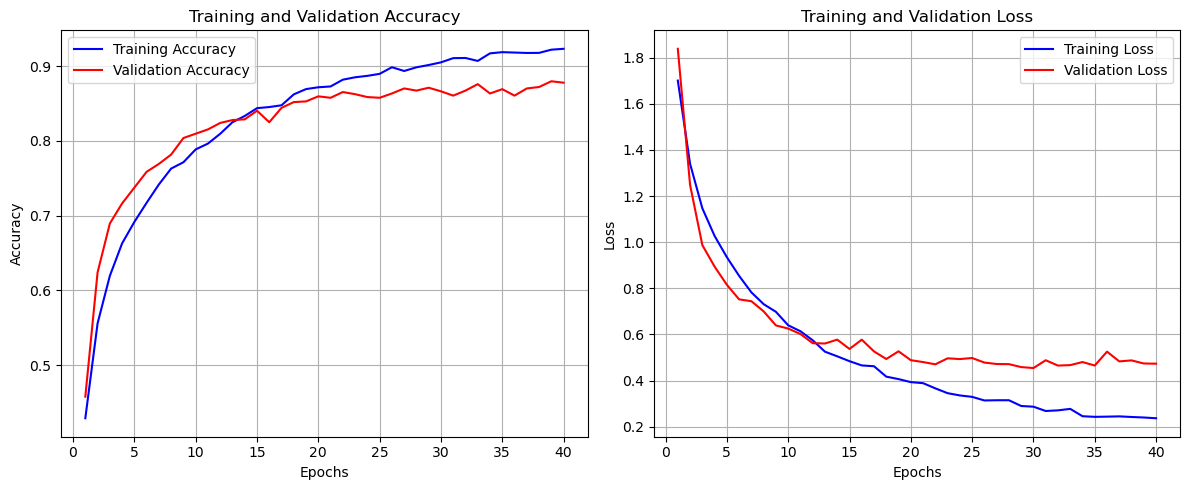

In [63]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
training_accuracy = resnet_history.history['accuracy']
validation_accuracy = resnet_history.history['val_accuracy']
training_loss = resnet_history.history['loss']
validation_loss = resnet_history.history['val_loss']

# Create epochs for the x-axis
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', color ='blue')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color ='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()


In [57]:
from tensorflow.keras.applications import Xception

# Load pre-trained Xception base
Xception_base = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')

# Freeze the base layers
Xception_base.trainable = False

# Build the Xception model
xception_model = Sequential()
xception_model.add(Xception_base)
xception_model.add(BatchNormalization())
xception_model.add(Dropout(0.35))
xception_model.add(Dense(220, activation='relu'))
xception_model.add(Dense(10, activation='softmax'))

# Compile the Xception model
xception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Xception model
xception_history = xception_model.fit(train_ds, validation_data=validation_ds, epochs=100, callbacks=[early_stopping])



Epoch 1/100
 13/293 ━━━━━━━━━━━━━━━━━━━━ 4:03 868ms/step - accuracy: 0.2333 - loss: 2.6061

KeyboardInterrupt: 

In [ ]:
# Save the Xception model
xception_model.save('D:\epicccc\Model/Xception.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


C:\Users\achut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


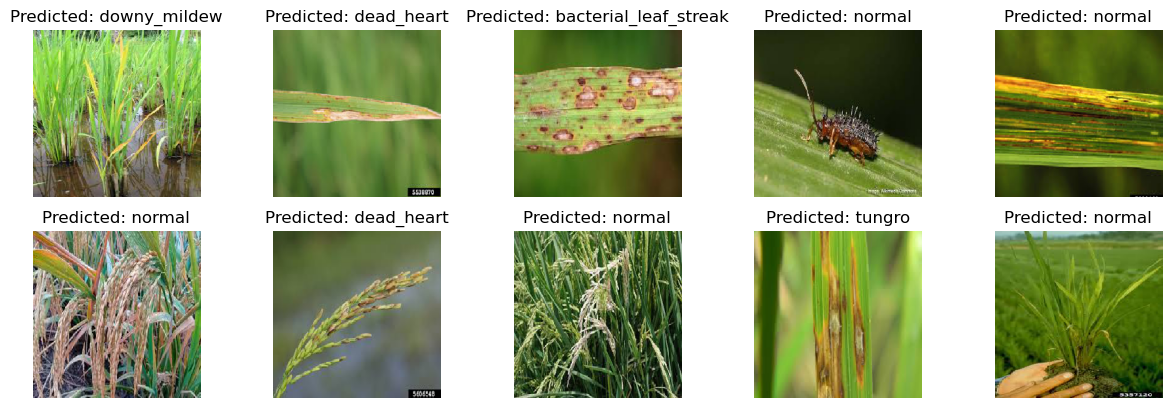

In [26]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans

# Load pre-trained DenseNet121 model
model = load_model('D:/epicccc/Model/Xception.keras')

# Define the directory containing images
images_dir = 'D:/epicccc/modelll'

# Define a dictionary to map predicted class indices to class names
class_names = {
    0: 'bacterial_leaf_blight',
    1: 'bacterial_leaf_streak',
    2: 'bacterial_panicle_blight',
    3: 'blast',
    4: 'brown_spot',
    5: 'dead_heart',
    6: 'downy_mildew',
    7: 'hispa',
    8: 'normal',
    9: 'tungro'
}

# Randomly select 10 image files from the directory
image_files = os.listdir(images_dir)
random_images = random.sample(image_files, 10)

# Extract features from each image
features = []
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features.append(model.predict(x).flatten())  # Flatten the output of the model

# Convert list of feature vectors to numpy array
features = np.array(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Function to display images with predicted labels
def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Predicted: {labels[i]}")
        plt.axis('off')
    plt.show()

# Predicted labels for each image
predicted_labels = []

# Print predicted labels for each image and display images
for img_file in random_images:
    img_path = os.path.join(images_dir, img_file)
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predicted_label_index = model.predict(x)
    predicted_label = class_names[np.argmax(predicted_label_index)]  # Map predicted class index to class name
    predicted_labels.append(predicted_label)

# Display images with predicted labels
display_images_with_labels(random_images, predicted_labels)


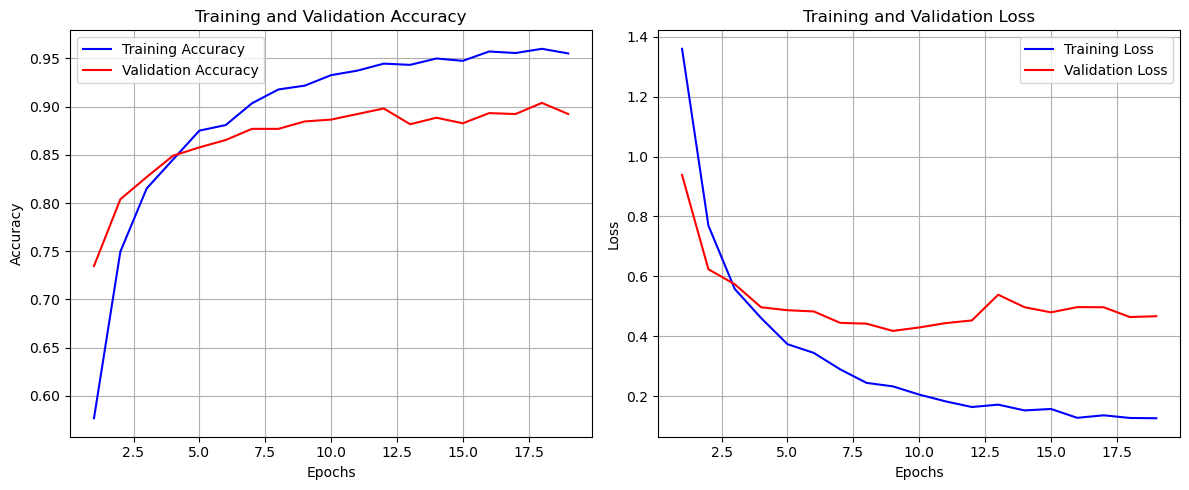

In [59]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
training_accuracy = xception_history.history['accuracy']
validation_accuracy = xception_history.history['val_accuracy']
training_loss = xception_history.history['loss']
validation_loss = xception_history.history['val_loss']

# Create epochs for the x-axis
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss',  color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss',  color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()
